In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'Colab Notebooks/data'

Mounted at /content/gdrive


In [0]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [0]:
# memory footprint support libraries/code
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize
import psutil
import humanize
import os
import GPUtil as GPU
GPUs = GPU.getGPUs()
# XXX: only one GPU on Colab and isn’t guaranteed
gpu = GPUs[0]
def printm():
 process = psutil.Process(os.getpid())
 print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " | Proc size: " + humanize.naturalsize( process.memory_info().rss))
 print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
printm()

Gen RAM Free: 12.5 GB  | Proc size: 748.1 MB
GPU RAM Free: 11320MB | Used: 121MB | Util   1% | Total 11441MB


In [0]:
!ls "/content/gdrive/My Drive/data"

original  resized_224  resized_299


In [0]:
import cv2
import tensorflow
from keras import layers
from keras import models
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras.layers import Activation, Dense
from keras.models import Sequential 
from keras.layers import Conv2D
from keras.layers import ZeroPadding2D
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras import optimizers 
from keras.preprocessing.image import ImageDataGenerator 
import os 
import cv2
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
#directory of the dataset
base_dir = '/content/gdrive/My Drive/data/resized_224'

train_dir = '/content/gdrive/My Drive/data/resized_224/train'
validation_dir = '/content/gdrive/My Drive/data/resized_224/validation'
test_dir = '/content/gdrive/My Drive/data/resized_224/test'





In [0]:


#adding a densely connected classifier on top of the convolutional base
model = models.Sequential()
model = Sequential()

input_shape = (224, 224, 3)

#Instantiate an empty model
model.add(layers.Conv2D(64, (3, 3), input_shape=input_shape, padding='same', activation='relu'))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same',))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same',))
model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same',))
model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same',))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same',))
model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same',))
model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same',))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same',))
model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same',))
model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same',))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(1))
model.add(layers.Dense(4096, activation='relu'))
model.add(layers.Dense(4096, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
      

model.summary() 


#training our CNN using data augmentation generators 
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True, 
    fill_mode='nearest')

#note that validation data shouldnot be augmentated 
test_datagen=ImageDataGenerator(rescale=1./255)
validation_datagen=ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224,224),
    batch_size=64,
    class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(224,224),
    batch_size=64,
    class_mode='binary')

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

history = model.fit_generator(
    train_generator,
    steps_per_epoch=200,
    epochs=100,
    verbose=1,
    validation_data=validation_generator,
    validation_steps=50)
    

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv

In [0]:
#test the vgg16 net 

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224,224),
    batch_size=64,
    class_mode='binary')

print('Evaluating the network ...')
test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('final test acc:', test_acc)

Found 200 images belonging to 2 classes.
Evaluating the network ...
final test acc: 0.7440664556962026


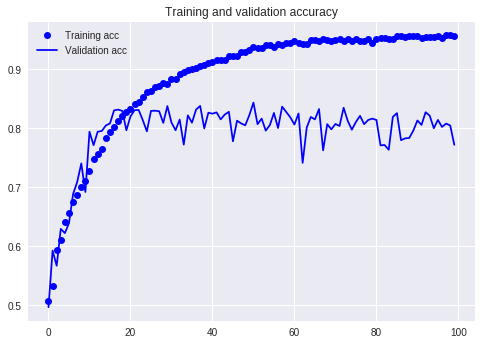

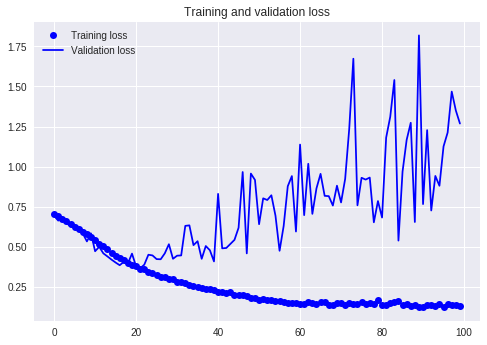

In [0]:
#finally plot the loss and accuracy of the model over the training and validation data during training

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [0]:
#Saving the model
model.save('cardiomegaly_1_bb.h5')

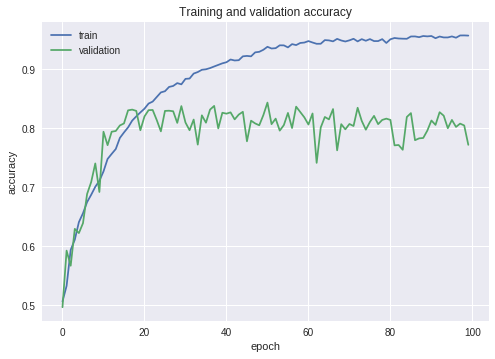

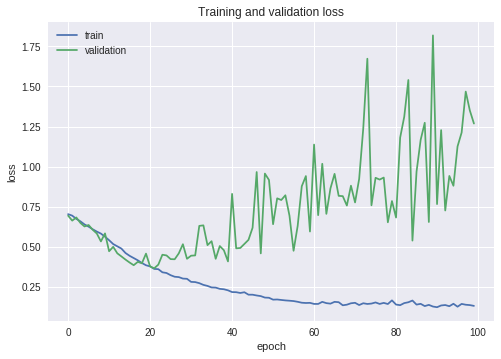

In [0]:
# Plot Training History.
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
# save image to disk
plt.savefig('accuracy', dpi=250)
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
# save image to disk
plt.savefig('loss', dpi=250)
plt.show()

In [0]:
import keras
from keras.utils import plot_model
keras.utils.plot_model(model, to_file='./graph_1_bb.png')